(https://thecleverprogrammer.com/2023/06/12/rfm-analysis-using-python/)

##### dataset = https://statso.io/rfm-analysis-case-study/

### 
    recency (the date they made their last purchase)
    frequency (how often they make purchases)
    monetary value (the amount spent on purchases)


In [42]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

data = pd.read_csv("rfm_data.csv")
data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


In [43]:
display(data.shape)
display(data.isnull().sum())

(1000, 6)

CustomerID            0
PurchaseDate          0
TransactionAmount     0
ProductInformation    0
OrderID               0
Location              0
dtype: int64

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   PurchaseDate        1000 non-null   object 
 2   TransactionAmount   1000 non-null   float64
 3   ProductInformation  1000 non-null   object 
 4   OrderID             1000 non-null   int64  
 5   Location            1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [45]:
from datetime import datetime

# Convert 'PurchaseDate' to datetime
data['PurchaseDate'] = pd.to_datetime(data['PurchaseDate'])

# Calculate Recency
data['Recency'] = (datetime.now() - data['PurchaseDate']).dt.days

# Calculate Frequency
frequency_data = data.groupby('CustomerID')['OrderID'].count().reset_index()
frequency_data.rename(columns={'OrderID': 'Frequency'}, inplace=True)
data = data.merge(frequency_data, on='CustomerID', how='left')

# Calculate Monetary Value
monetary_data = data.groupby('CustomerID')['TransactionAmount'].sum().reset_index()
monetary_data.rename(columns={'TransactionAmount': 'MonetaryValue'}, inplace=True)
data = data.merge(monetary_data, on='CustomerID', how='left')

# Display the first few rows to verify
data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,679,1,943.31
1,2188,2023-04-11,463.70,Product A,176819,London,679,1,463.70
2,4608,2023-04-11,80.28,Product A,340062,New York,679,1,80.28
3,2559,2023-04-11,221.29,Product A,239145,London,679,1,221.29
4,9482,2023-04-11,739.56,Product A,194545,Paris,679,1,739.56


In [46]:
# Define scoring criteria for each RFM value
recency_scores = [5, 4, 3, 2, 1]  # Higher score for lower recency (more recent)
frequency_scores = [1, 2, 3, 4, 5]  # Higher score for higher frequency
monetary_scores = [1, 2, 3, 4, 5]  # Higher score for higher monetary value

# Calculate RFM scores
data['RecencyScore'] = pd.cut(data['Recency'], bins=5, labels=recency_scores)
data['FrequencyScore'] = pd.cut(data['Frequency'], bins=5, labels=frequency_scores)
data['MonetaryScore'] = pd.cut(data['MonetaryValue'], bins=5, labels=monetary_scores)

# Change the data type of a column to category
data['RecencyScore'] = data['RecencyScore'].astype('int')
data['FrequencyScore'] = data['FrequencyScore'].astype('int')
data['MonetaryScore'] = data['MonetaryScore'].astype('int')

data.head()


,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,679,1,943.31,1,1,2
1,2188,2023-04-11,463.70,Product A,176819,London,679,1,463.70,1,1,1
2,4608,2023-04-11,80.28,Product A,340062,New York,679,1,80.28,1,1,1
3,2559,2023-04-11,221.29,Product A,239145,London,679,1,221.29,1,1,1
4,9482,2023-04-11,739.56,Product A,194545,Paris,679,1,739.56,1,1,2


In [47]:
# Calculate RFM score by combining the individual scores
data['RFM_Score'] = data['RecencyScore'] + data['FrequencyScore'] + data['MonetaryScore']

# Create RFM segments based on the RFM score
segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
data['Value Segment'] = pd.qcut(data['RFM_Score'], q=3, labels=segment_labels)

data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,679,1,943.31,1,1,2,4,Low-Value
1,2188,2023-04-11,463.70,Product A,176819,London,679,1,463.70,1,1,1,3,Low-Value
2,4608,2023-04-11,80.28,Product A,340062,New York,679,1,80.28,1,1,1,3,Low-Value
3,2559,2023-04-11,221.29,Product A,239145,London,679,1,221.29,1,1,1,3,Low-Value
4,9482,2023-04-11,739.56,Product A,194545,Paris,679,1,739.56,1,1,2,4,Low-Value


In [48]:
print(data['Value Segment'].unique())
print(data['Value Segment'].value_counts())

['Low-Value', 'Mid-Value', 'High-Value']
Categories (3, object): ['Low-Value' < 'Mid-Value' < 'High-Value']
Value Segment
Low-Value     435
Mid-Value     386
High-Value    179
Name: count, dtype: int64


In [49]:
# RFM Segment Distribution
segment_counts = data['Value Segment'].value_counts().reset_index()
segment_counts.columns = ['Value Segment', 'Count']

pastel_colors = px.colors.qualitative.Pastel

# Create the bar chart
fig_segment_dist = px.bar(segment_counts, x='Value Segment', y='Count', 
                          color='Value Segment', color_discrete_sequence=pastel_colors,
                          title='RFM Value Segment Distribution')

# Update the layout
fig_segment_dist.update_layout(xaxis_title='RFM Value Segment',
                              yaxis_title='Count',
                              showlegend=False)

# Show the figure
fig_segment_dist.show()

In [50]:
# Create a new column for RFM Customer Segments
data['RFM Customer Segments'] = ''

# Assign RFM segments based on the RFM score
data.loc[data['RFM_Score'] >= 9, 'RFM Customer Segments'] = 'Champions'
data.loc[(data['RFM_Score'] >= 6) & (data['RFM_Score'] < 9), 'RFM Customer Segments'] = 'Potential Loyalists'
data.loc[(data['RFM_Score'] >= 5) & (data['RFM_Score'] < 6), 'RFM Customer Segments'] = 'At Risk Customers'
data.loc[(data['RFM_Score'] >= 4) & (data['RFM_Score'] < 5), 'RFM Customer Segments'] = "Can't Lose"
data.loc[(data['RFM_Score'] >= 3) & (data['RFM_Score'] < 4), 'RFM Customer Segments'] = "Lost"

# Print the updated data with RFM segments
data[['CustomerID', 'RFM Customer Segments']].head()

,CustomerID,RFM Customer Segments
0,8814,Can't Lose
1,2188,Lost
2,4608,Lost
3,2559,Lost
4,9482,Can't Lose


C:\Users\rushi\AppData\Local\Temp\ipykernel_1456\1446292638.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



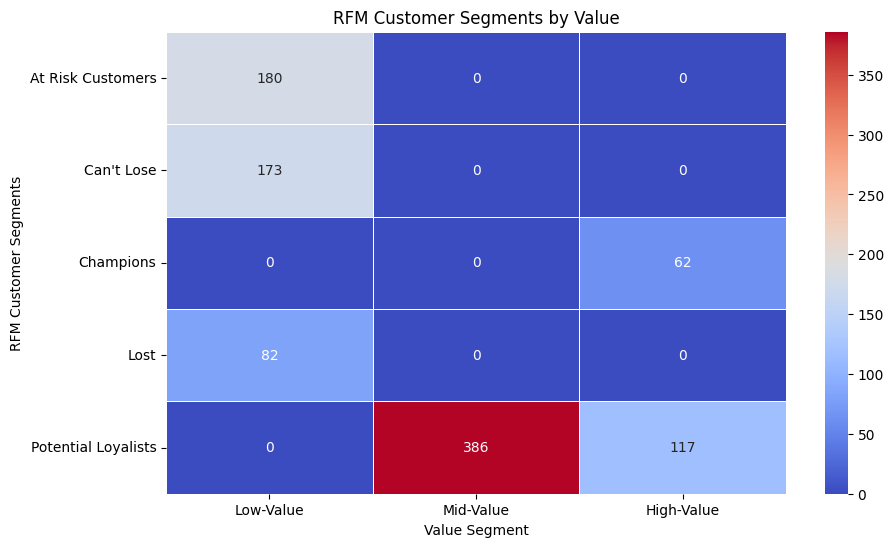

In [51]:
# Create a pivot table for heatmap representation
segment_product_counts = data.groupby(['Value Segment', 'RFM Customer Segments']).size().reset_index(name='Count')
segment_pivot = segment_product_counts.pivot(index='RFM Customer Segments', columns='Value Segment', values='Count').fillna(0)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(segment_pivot, annot=True, fmt='.0f', cmap='coolwarm', linewidths=0.5)
plt.xlabel('Value Segment')
plt.ylabel('RFM Customer Segments')
plt.title('RFM Customer Segments by Value')
plt.show()

In [52]:
# Filter the data to include only the customers in the Champions segment
champions_segment = data[data['RFM Customer Segments'] == 'Champions']

fig = go.Figure()
fig.add_trace(go.Box(y=champions_segment['RecencyScore'], name='Recency'))
fig.add_trace(go.Box(y=champions_segment['FrequencyScore'], name='Frequency'))
fig.add_trace(go.Box(y=champions_segment['MonetaryScore'], name='Monetary'))

fig.update_layout(title='Distribution of RFM Values within Champions Segment',yaxis_title='RFM Value',showlegend=True)

fig.show()

In [53]:
correlation_matrix = champions_segment[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].corr()

# Visualize the correlation matrix using a heatmap
fig_heatmap = go.Figure(data=go.Heatmap(
                   z=correlation_matrix.values,
                   x=correlation_matrix.columns,
                   y=correlation_matrix.columns,
                   colorscale='RdBu',
                   colorbar=dict(title='Correlation')))

fig_heatmap.update_layout(title='Correlation Matrix of RFM Values within Champions Segment')

fig_heatmap.show()

In [54]:
import plotly.colors

pastel_colors = plotly.colors.qualitative.Pastel

segment_counts = data['RFM Customer Segments'].value_counts()

# Create a bar chart to compare segment counts
fig = go.Figure(data=[go.Bar(x=segment_counts.index, y=segment_counts.values,
                            marker=dict(color=pastel_colors))])

# Set the color of the Champions segment as a different color
champions_color = 'rgb(158, 202, 225)'
fig.update_traces(marker_color=[champions_color if segment == 'Champions' else pastel_colors[i]
                                for i, segment in enumerate(segment_counts.index)],
                  marker_line_color='rgb(8, 48, 107)',
                  marker_line_width=1.5, opacity=0.6)

# Update the layout
fig.update_layout(title='Comparison of RFM Segments',
                  xaxis_title='RFM Segments',
                  yaxis_title='Number of Customers',
                  showlegend=False)

fig.show()

In [55]:
# Calculate the average Recency, Frequency, and Monetary scores for each segment
segment_scores = data.groupby('RFM Customer Segments')[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].mean().reset_index()

# Create a grouped bar chart to compare segment scores
fig = go.Figure()

# Add bars for Recency score
fig.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segments'],
    y=segment_scores['RecencyScore'],
    name='Recency Score',
    marker_color='rgb(158,202,225)'
))

# Add bars for Frequency score
fig.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segments'],
    y=segment_scores['FrequencyScore'],
    name='Frequency Score',
    marker_color='rgb(94,158,217)'
))

# Add bars for Monetary score
fig.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segments'],
    y=segment_scores['MonetaryScore'],
    name='Monetary Score',
    marker_color='rgb(32,102,148)'
))

# Update the layout
fig.update_layout(
    title='Comparison of RFM Segments based on Recency, Frequency, and Monetary Scores',
    xaxis_title='RFM Segments',
    yaxis_title='Score',
    barmode='group',
    showlegend=True
)

fig.show()

### Summary

##### RFM Analysis is used to understand and segment customers based on their buying behaviour. RFM stands for recency, frequency, and monetary value, which are three key metrics that provide information about customer engagement, loyalty, and value to a business. I hope you liked this article on RFM Analysis using Python. Feel free to ask valuable questions in the comments section below.